<a href="https://colab.research.google.com/github/ZPavlo/ML_projects/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
BATCH_SIZE = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


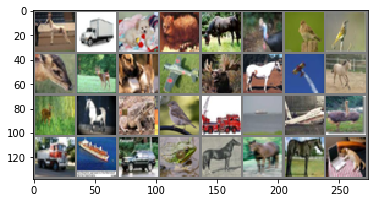

horse truck   dog   cat


In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(3, 6, 5), 
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, 2),
                                   nn.Conv2d(6, 16, 5),
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, 2))
        
        self.fc = nn.Sequential(nn.Linear(16 * 5 * 5, 120),
                                nn.ReLU(), 
                                nn.Linear(120, 84),
                                nn.ReLU(), 
                                nn.Linear(84, 10))

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc(x)
        return x


net = Net()
if torch.cuda.is_available():
  net.cuda()
  print("Cuda True")
else:
  print("No Cuda")

Cuda True


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [0]:
for epoch in range(1, 18):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 1):
      
        inputs, labels = data
        if torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()
          
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Train [%d, %5d] loss: %.3f' %
          (epoch, i, running_loss / len(trainloader)))
    running_loss = 0.0
    with torch.no_grad():
      for i, data in enumerate(testloader, 1):
          inputs, labels = data
          if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          
          running_loss += loss.item()
      
    print('Test [%d, %5d] loss: %.3f' %
          (epoch, i, running_loss / len(testloader)))
    running_loss = 0.0
print('Finished Training')

Train [1,  1563] loss: 2.170
Test [1,   313] loss: 1.975
Train [2,  1563] loss: 1.789
Test [2,   313] loss: 1.641
Train [3,  1563] loss: 1.571
Test [3,   313] loss: 1.511
Train [4,  1563] loss: 1.463
Test [4,   313] loss: 1.431
Train [5,  1563] loss: 1.376
Test [5,   313] loss: 1.342
Train [6,  1563] loss: 1.313
Test [6,   313] loss: 1.290
Train [7,  1563] loss: 1.257
Test [7,   313] loss: 1.263
Train [8,  1563] loss: 1.205
Test [8,   313] loss: 1.211
Train [9,  1563] loss: 1.163
Test [9,   313] loss: 1.171
Train [10,  1563] loss: 1.123
Test [10,   313] loss: 1.148
Train [11,  1563] loss: 1.086
Test [11,   313] loss: 1.136
Train [12,  1563] loss: 1.051
Test [12,   313] loss: 1.132
Train [13,  1563] loss: 1.019
Test [13,   313] loss: 1.095
Train [14,  1563] loss: 0.992
Test [14,   313] loss: 1.093
Train [15,  1563] loss: 0.964
Test [15,   313] loss: 1.085
Train [16,  1563] loss: 0.938
Test [16,   313] loss: 1.072
Train [17,  1563] loss: 0.911
Test [17,   313] loss: 1.076
Finished Traini

In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

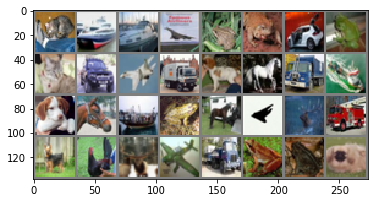

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer   cat plane plane


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 80 %
Accuracy of  bird : 46 %
Accuracy of   cat : 55 %
Accuracy of  deer : 61 %
Accuracy of   dog : 50 %
Accuracy of  frog : 72 %
Accuracy of horse : 50 %
Accuracy of  ship : 78 %
Accuracy of truck : 73 %
